In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# 计算组合值。
from scipy.special import comb

mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False
mpl.rcParams["font.size"] = 12

In [2]:
def ensemble_error(n, error):
    """用来计算集成分类器发生错误的概率密度值。
    如果要使集成评估器预测错误，则需要半数以上的基本评估器发生错误。
    当n为偶数时，达到半数错误，即认为集成评估器预测错误。
    Parameters
    ----------
    n : int
    基本评估器的数量
    error : array-like, shape=(num, 1)
    每一个基本评估器发生错误的概率。
    """
    # 确保error为二维的ndarray数组类型，以用于后面的广播运算。
    error = np.asarray(error)
    # 计算半数错误的评估器个数。
    start = np.ceil(n / 2.0)
    # 计算当集成评估器发生错误，基本评估器错误个数的可能区间。
    k = np.arange(start, n + 1)
    # error的形状为(n1, 1)，k的形状为(n2,)，经过广播计算后，
    # v的形状为(n1, n2)。每一行为一个不同错误率，每一列为在不同的k值
    #（预测错误的评估器个数）下得到的错误概率。
    v = comb(n, k) * error ** k * (1-error) ** (n - k)
    # 将每一行的概率相加，就是最终在每个错误率下，集成评估器的错误率。
    return np.sum(v, axis=1)

ensemble_error(11, [[0.25], [0.3]])

array([0.03432751, 0.07822479])

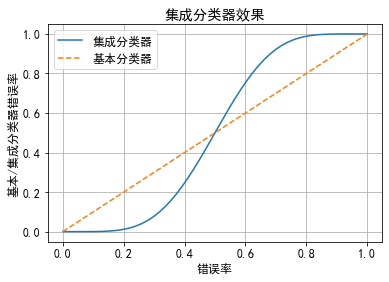

In [3]:
# 定义基本评估器发生错误的概率区间。
error = np.arange(0.0, 1.01, 0.01)
# 计算在不同error取值的情况下，集成评估器发生错误的概率。
ens_errors = ensemble_error(n=11, error=error[:, np.newaxis])
plt.plot(error, ens_errors, label="集成分类器")
plt.plot(error, error, linestyle="--", label="基本分类器")
plt.xlabel("错误率")
plt.ylabel("基本/集成分类器错误率")
plt.legend(loc="best")
plt.title("集成分类器效果")
plt.grid()

In [4]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split

# flip_y：类别随机分配的比例。值越大，则噪声越大，分类难度越大。
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_classes=3, random_state=0, flip_y=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 定义一颗不限生长的决策树（强学习器）。
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("决策树准确率：")
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

决策树准确率：
1.0
0.48333333333333334


In [5]:
# base_estimator：指定基本评估器。即bagging算法所组合的评估器。
# n_estimators：基本评估器的数量。有多少个评估器，就会进行多少次随机采样，产生多少个原始数据集的子集。
# max_samples：每次随机采样的样本数量。该参数可以是int类型或float类型。如果是int类型，则指定采样的样本数量。
# 如果是float类型，则指定采样占原始数据集的比例。
# max_features：每次随机采样的特征数量。可以是int类型或float类型。
# bootstrap：指定是否进行放回抽样。默认为True。
# bootstrap_features：指定对特征是否进行重复抽取。默认为False。

bag = BaggingClassifier(base_estimator=tree, n_estimators=100, max_samples=0.8, max_features=0.8)
bag.fit(X_train, y_train)
print("bagging准确率：")
print(bag.score(X_train, y_train))
print(bag.score(X_test, y_test))

bagging准确率：
1.0
0.6766666666666666


In [6]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print("线性回归R^2值：")
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

线性回归R^2值：
0.5539411781927147
0.39289398450747565


In [8]:
bag = BaggingRegressor(lr, n_estimators=100, max_samples=0.9, max_features=0.9)
bag.fit(X, y)

print("bagging R^2值：")
print(bag.score(X_train, y_train))
print(bag.score(X_test, y_test))

bagging R^2值：
0.5492296198787749
0.42166970472834586


In [9]:
# 葡萄酒数据集
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X, y = load_wine(return_X_y=True)
# 为了可视化方便，简化操作，我们只取两个特征。
X = X[:, [0, 10]]
# 我们过滤掉0的类别，只取两个类别。
X = X[y != 0]
y = y[y != 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
tree = DecisionTreeClassifier(criterion="gini")
tree = tree.fit(X_train, y_train)
print("决策树分类准确率：")
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

决策树分类准确率：
1.0
0.8611111111111112


In [10]:
# n_jobs 开辟进程的数量。如果指定-1，则表示利用现有的所有CPU来实现并行化。
bag = BaggingClassifier(base_estimator=tree, n_estimators=100,
max_samples=0.9, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1,
random_state=0)
bag = bag.fit(X_train, y_train)

print("bagging准确率：")
print(bag.score(X_train, y_train))
print(bag.score(X_test, y_test))

bagging准确率：
1.0
0.8888888888888888


In [11]:
# n_estimators：基本评估器（决策树）的数量。
# max_samples：每次抽样用于训练基本评估器的样本数量。
# bootstrap：如果为True（默认值），抽样允许重复（放回抽样）。如果为False，则使用所有的样本训练每棵决策树。
# 注意该参数的含义与bagging的参数有所不同。
# max_samples：当bootstrap为True时，训练每棵决策树所使用的样本数。默认为None（使用所有的样本）。
rf = RandomForestClassifier(n_estimators=100, criterion="gini", random_state=0)
rf.fit(X_train, y_train)

print("随机森林准确率：")
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

随机森林准确率：
1.0
0.8888888888888888


In [12]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y):
    """绘制model模型的决策边界。
    绘制决策边界，同时绘制样本数据X与对应的类别y，
    用于可视化模型的分类效果。
    Parameters
    ----------
    model : object
    模型对象。
    X : array-like
    需要绘制的样本数据。
    y : array-like
    每个样本数据对应的类别（标签）。
    """
    # 定义不同类别的颜色与符号。可以用于二分类与三分类。
    color = ["r", "g", "b"]
    marker = ["o", "v", "x"]
    # 获取数据中不重复的标签。
    class_label = np.unique(y)
    # 定义颜色图，在绘制等高线的时候使用，不同的值使用不同的颜色来绘制。
    cmap = ListedColormap(color[: len(class_label)])
    # 获取每个特征的最小值与最大值。
    x1_min, x2_min = np.min(X, axis=0)
    x1_max, x2_max = np.max(X, axis=0)
    # 定义每个特征的取值范围。
    x1 = np.arange(x1_min - 1, x1_max + 1, 0.02)
    x2 = np.arange(x2_min - 1, x2_max + 1, 0.02)
    # 对数组x1,x2进行扩展，获取二者的笛卡尔积组合，用于送入模型中，进行预测。
    X1, X2 = np.meshgrid(x1, x2)
    # 将之前两个特征的笛卡尔积组合送入模型中，预测结果。
    Z = model.predict(np.array([X1.ravel(),
    X2.ravel()]).T).reshape(X1.shape)
    # 根据Z值的不同，绘制等高线（不同的值使用不同的颜色表示）。
    plt.contourf(X1, X2, Z, cmap=cmap, alpha=0.5)
    # 绘制样本数据X。
    for i, class_ in enumerate(class_label):
        plt.scatter(x=X[y == class_, 0], y=X[y == class_, 1], c=cmap.colors[i], label=class_, marker=marker[i])
    plt.legend()

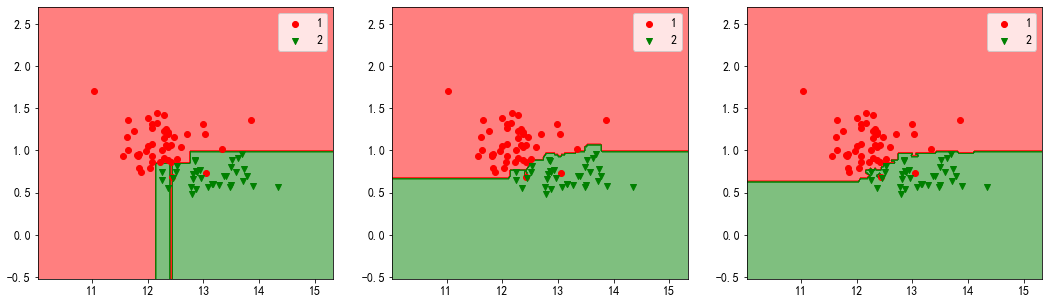

In [13]:
plt.figure(figsize=(18, 5))
name = ["决策树", "bagging", "随机森林"]
for index, estimator in enumerate([tree, bag, rf], start=1):
    plt.subplot(1, 3, index)
    plot_decision_boundary(estimator, X_train, y_train)

(359, 64) (359,)


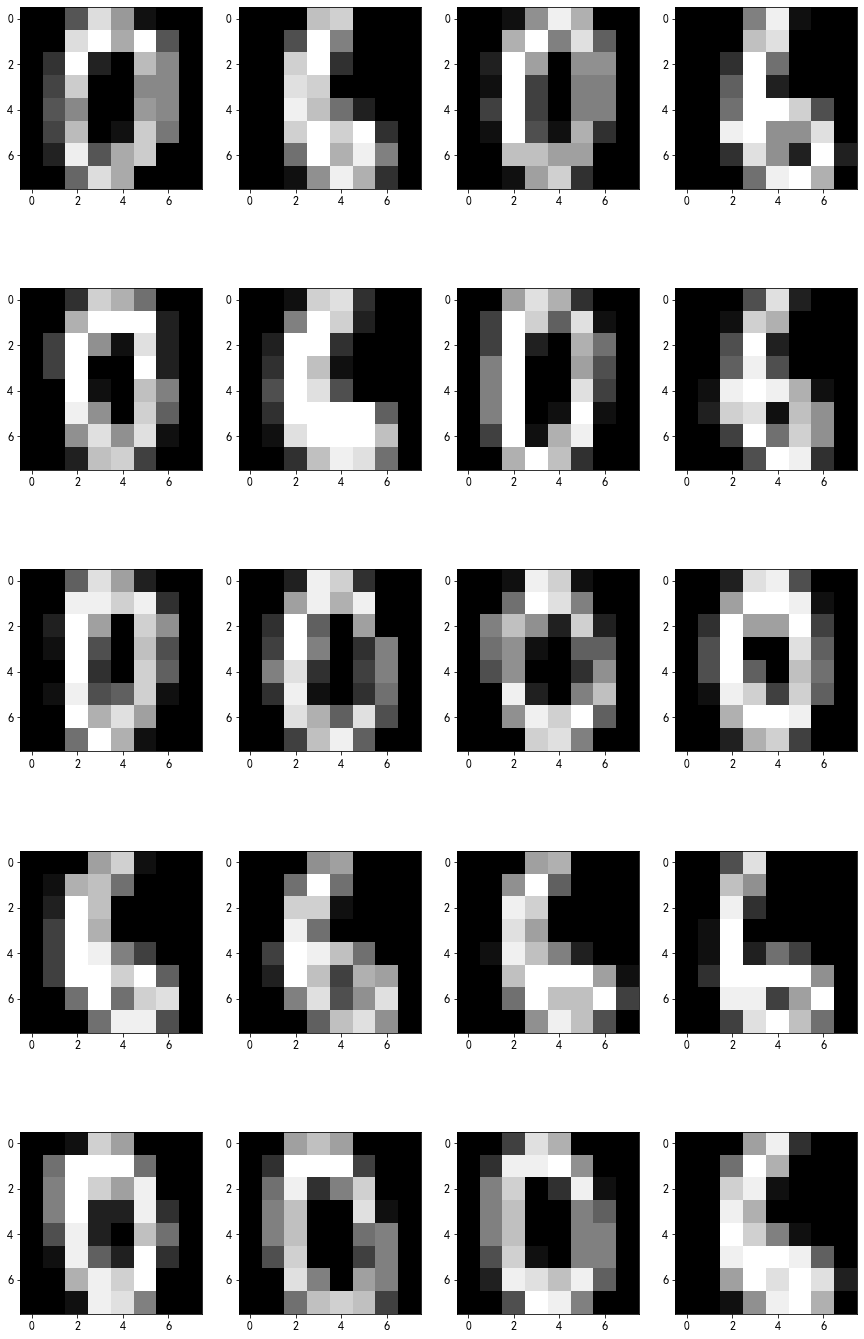

In [14]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

digits = load_digits()
X, y = digits.data, digits.target
mask = (y == 0) | (y == 6)
X = X[mask]
y = y[mask]
print(X.shape, y.shape)

row, col = 5, 4
fig, ax = plt.subplots(row, col)
ax = ax.ravel()
fig.set_size_inches(15, row * 5)
for i in range(row * col):
    ax[i].imshow(X[i].reshape(8, 8), cmap="gray")

In [15]:
rf = RandomForestClassifier(n_estimators=100, max_features=0.8, random_state=0)
rf.fit(X, y)
print(rf.score(X, y))

1.0


[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.12981904e-04 1.11002333e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.31831458e-04 0.00000000e+00
 7.59283078e-04 1.28214747e-02 2.50816352e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.74172641e-01 4.61586144e-03 0.00000000e+00
 0.00000000e+00 5.57141970e-05 0.00000000e+00 2.69864695e-03
 9.25326713e-03 1.87840875e-03 9.48801255e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.14899529e-04 1.26538510e-02
 2.75078592e-01 1.38217325e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.01708937e-04 2.69819236e-03
 4.38275419e-04 0.00000000e+00 8.92535273e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.10805889e-04
 0.00000000e+00 0.00000000e+00 1.12033345e-04 2.17925127e-04
 2.20251758e-04 2.58263493e-03 0.00000000e+00 0.00000000e+00]
1.0


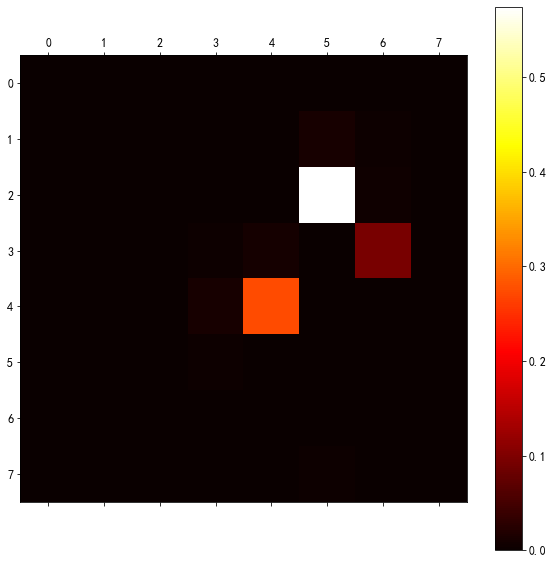

In [16]:
# 返回特征的重要度。特征的重要度根据该特征对目标变量（y）的可预测性来度量。
# 特征对目标变量的可预测性越有帮助，则重要度越大，否则越小。
importances = rf.feature_importances_
print(importances)
# 特征重要度的权重之和为1。
print(np.sum(importances))
importances = importances.reshape(8, 8)
plt.figure(figsize=(10, 10))
# 绘制特征的重要度。
plt.matshow(importances, cmap=plt.cm.hot, fignum=0)
plt.colorbar()